In [1]:
using HDF5, StatsBase, PyPlot
push!(LOAD_PATH, "../Preprocesamiento/")
using ArraySetTools, OrdenaSets

┌ Info: Precompiling OrdenaSets [top-level]
└ @ Base loading.jl:1273


In [2]:
arxname="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"

"/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"

In [3]:
arx=h5open(arxname)

HDF5 data file: /home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5

In [4]:
names(arx)

7-element Array{String,1}:
 "CSDALindenberg"
 "CanalesBuenos" 
 "CanalesMalos"  
 "LFPSaturados"  
 "desde"         
 "freq"          
 "hasta"         

In [5]:
canales=read(arx["CanalesBuenos"])
lfp=read(arx["LFPSaturados"]);
nmax=size(lfp)[3]

2000

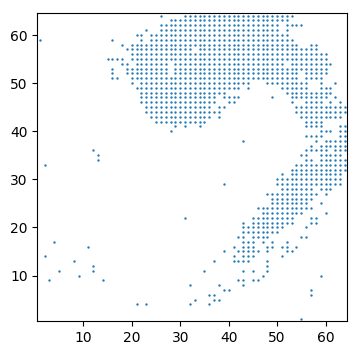

PyObject <matplotlib.collections.PathCollection object at 0x7f0798ffc400>

In [6]:
ff=figure(figsize=(4,4))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(canales[:,2], canales[:,1], s=0.5)

In [7]:
xx0=[31,32]
xx2=[42,15]
dire=2.0
bla=puntoZ2enlinea(xx0, dire)

2-element Array{Int64,1}:
 64
 17

In [8]:
blu=puntoZ2enlinea(xx0, dire)
lin=lineaenteros(xx0,[62,1])

32×2 Array{Int64,2}:
 31  32
 32  31
 33  30
 34  29
 35  28
 36  27
 37  26
 38  25
 39  24
 40  23
 41  22
 42  21
 43  20
  ⋮    
 51  12
 52  11
 53  10
 54   9
 55   8
 56   7
 57   6
 58   5
 59   4
 60   3
 61   2
 62   1

In [9]:
blu

2-element Array{Int64,1}:
 64
 17

In [10]:
ii=intersectlineamancha(canales,lin) 

0×2 Array{Int64,2}

In [11]:
yxref=[39,40]
tuabuelita=barreconjuntoyordena(canales, yxref);
unique(tuabuelita,dims=2)

alfamin = 0.015623728620476831


1050×3 Array{Int64,2}:
  0   0     1
 40  28     2
 41  29     3
 42  25     4
 42  26     5
 41  31     6
 42  27     7
 43  24     8
 42  28     9
 42  29    10
 43  25    11
 43  26    12
 42  30    13
  ⋮          
 12  12  1039
 10   9  1040
  9   3  1041
 13   8  1042
 11   5  1043
 16  11  1044
 14   2  1045
 17   4  1046
 34  13  1047
 33   2  1048
 35  13  1049
 36  12  1050

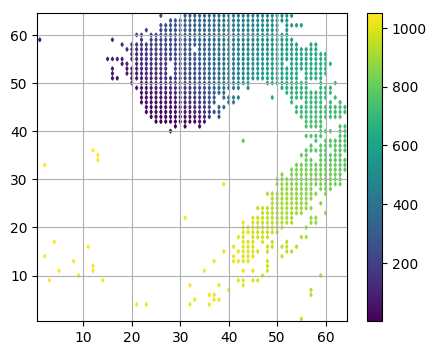

In [12]:
ff=figure(figsize=(5,4))
xlim(0.5,64.5)
ylim(0.5,64.5)
#scatter(canales[:,2], canales[:,1], s=0.5)
scatter(tuabuelita[:,2], tuabuelita[:,1], marker="d",s=3, cmap="viridis", c=tuabuelita[:,3])
colorbar()
grid()

In [26]:
function freediaconis(datos)
    # Freedman and Diaconis
    n=length(datos)
    m=iqr(datos)
    result=2*m/cbrt(n)
    return result
end
    
function sacaentropia(datos)
    binsize=freediaconis(datos)
    (vmin,vmax)=extrema(datos)
    if(binsize != 0 )
        rango=vmin:binsize:vmax
        histodo=fit(Histogram,datos,rango)
        pdf=histodo.weights./nmax;
        result=(entropy(pdf), binsize, length(rango))
    else
        result=(0, binsize, length(rango))
    end
    return result
end

sacaentropia (generic function with 1 method)

In [29]:
using InformationMeasures
ex=lfp[60,20,:]
ta=get_entropy(ex)
te=sacaentropia(ex)

(ta, te, length(ex))

(4.509986767104033, (3.012180445400878, 4.156463936122788, 40), 2000)

In [31]:
nchan=size(tuabuelita, 1)
hetas=zeros(nchan)
otra=zeros(nchan)
for j=1:nchan
    reng,col=canales[j,1],canales[j,2]
    ejemplo=lfp[reng,col,:]
    hetas[j], pu, pa=sacaentropia(ejemplo)
    println(j, " ", pa)
    otra[j]=get_entropy(ejemplo)
end

1 49
2 40
3 47
4 116
5 41
6 56
7 79
8 102
9 129
10 49
11 52
12 76
13 44
14 52
15 48
16 68
17 43
18 276
19 49
20 42
21 138
22 44
23 41
24 44
25 55
26 46
27 97
28 58
29 54
30 58
31 103
32 57
33 73
34 48
35 53
36 72
37 41
38 48
39 51
40 47
41 134
42 60
43 74
44 44
45 58
46 43
47 52
48 78
49 40
50 67
51 78
52 46
53 59
54 45
55 76
56 47
57 112
58 52
59 53
60 53
61 71
62 54
63 91
64 57
65 63
66 54
67 48
68 204
69 88
70 70
71 57
72 63
73 70
74 51
75 44
76 63
77 36
78 182
79 220
80 61
81 49
82 167
83 232
84 40
85 118
86 50
87 87
88 46
89 62
90 93
91 173
92 51
93 102
94 45
95 140
96 45
97 93
98 63
99 42
100 45
101 84
102 42
103 59
104 110
105 250
106 45
107 108
108 54
109 49
110 45
111 52
112 43
113 47
114 109
115 158
116 66
117 42
118 50
119 40
120 132
121 43
122 58
123 140
124 50
125 121
126 42
127 63
128 68
129 72
130 44
131 48
132 49
133 70
134 43
135 52
136 66
137 45
138 51
139 72
140 104
141 81
142 46
143 47
144 49
145 39
146 49
147 43
148 53
149 212
150 120
151 48
152 75
153 44
154 37
15

In [32]:
sqrt(2000)

44.721359549995796

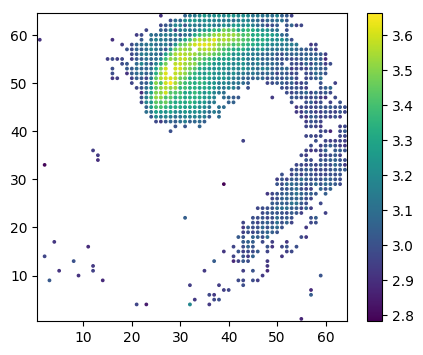

PyObject <matplotlib.colorbar.Colorbar object at 0x7f0798402438>

In [34]:
ff=figure(figsize=(5,4))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(canales[:,2], canales[:,1], s=hetas, c=hetas)
colorbar()

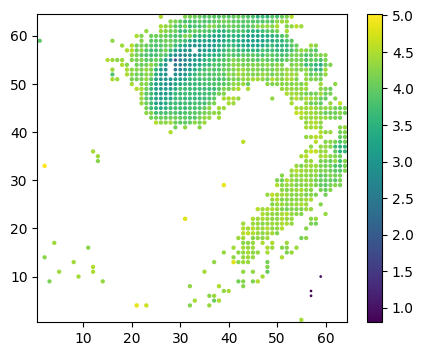

PyObject <matplotlib.colorbar.Colorbar object at 0x7f07984d91d0>

In [33]:
ff=figure(figsize=(5,4))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(canales[:,2], canales[:,1], s=otra, c=otra)
colorbar()

In [35]:
fufu=hetas-otra

1050-element Array{Float64,1}:
 -1.2017047713580835 
 -1.4997975323860695 
 -1.3124895451953082 
 -0.2180532055649742 
 -1.4927292273587325 
 -1.0754737982391696 
 -0.650553416635772  
 -0.34961804812297403
 -0.04712064021812923
 -1.2740319096347683 
 -1.1280890813575697 
 -0.7130640344347499 
 -1.4003031282830896 
  ⋮                  
 -1.2099197640822155 
 -1.1284360289814024 
 -1.2395621055683819 
 -1.3465557043785599 
 -0.9384893992271222 
 -0.6178684755083865 
 -1.093472647805509  
 -1.2460041675661517 
 -0.9500131285688935 
 -1.1560591309014971 
 -0.22604901457527982
 -0.4526954836824184 

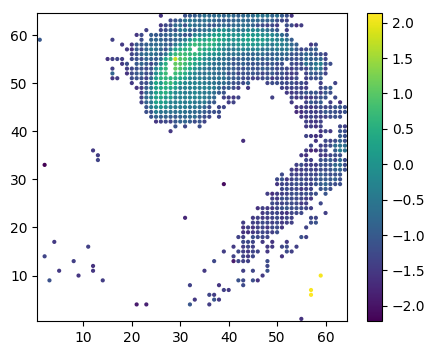

PyObject <matplotlib.colorbar.Colorbar object at 0x7f07983a6320>

In [36]:
ff=figure(figsize=(5,4))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(canales[:,2], canales[:,1], s=4, c=fufu)
colorbar()

In [ ]:
todas=zeros(64,64)
for j=1:64, k=1:64
    ejemplo=lfp[j,k,:]
    if(j,k)!=(1,1)
    todas[j,k]=sacaentropia(ejemplo)[2]
    end
end

In [ ]:
imshow(todas, origin="lower", vmin=0, vmax=11)
colorbar()

In [ ]:
?entropy